In [4]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../modules")

from HPIB_plot import *
from scipy.constants import e, k
from scipy.special import lambertw
from scipy.optimize import least_squares

'C:/Users/Zucchi/Documents/Medidas/240704 - TN1 TN9 TP6 TP10/TP7/IdVgs - 240706 014255.png'

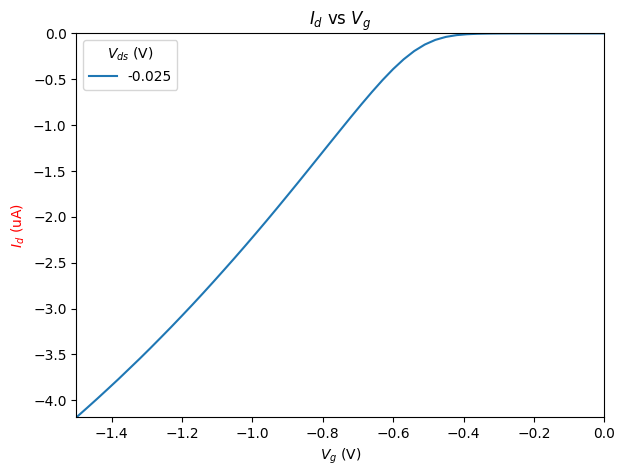

In [5]:
path='C:/Users/Zucchi/Documents/Medidas/240704 - TN1 TN9 TP6 TP10/TP7/IdVgs - 240706 014255.csv'
Plot(path, 'Vg', 'Id')

In [8]:
T=296
try: df=pd.read_csv(path, header=[0, 1])
except: print("Error opening VGS\n")
    
if df.columns.levels[1][0] != 'None':
    df.columns.levels[1][0] != ''

VD=float(df.columns.levels[1][0])
VG=getpd(df, 'Vg')
ID=getpd(df, 'Id')

if np.average(ID) < 0:
    VD=-VD
    VG=-VG
    ID=-ID

if 'gm' not in df.columns:
    gm=(np.diff(df['Id'].T)/np.diff(df['Vg'].T)).T
    gm=np.append([gm[0]], gm)

    header=pd.MultiIndex.from_product([['gm'],
                                df['Vg'].columns])

    df2=pd.DataFrame(data=gm, columns=header)
    df=pd.concat((df, df2), axis=1)

    df.to_csv(path, index=False, float_format='%.5E')
else:
    gm=getpd(df, 'gm')

if 'dgm' not in df.columns:
    dgm=(np.diff(df['gm'].T)/np.diff(df['Vg'].T)).T
    dgm=np.append(dgm, [dgm[-1]])

    header=pd.MultiIndex.from_product([['dgm'],
                                df['Vg'].columns])

    df2=pd.DataFrame(data=dgm, columns=header)
    df=pd.concat((df, df2), axis=1)

    df.to_csv(path, index=False, float_format='%.5E')
else:
    dgm=getpd(df, 'dgm')

plt.close('all')

np.nanmin(np.diff(VG)/np.diff(np.log10(ID)))*1000

C:\Users\Zucchi\AppData\Local\Temp\ipykernel_9564\3369784818.py:47: RuntimeWarning: invalid value encountered in log10
  np.nanmin(np.diff(VG)/np.diff(np.log10(ID)))*1000


59.14351529745749

In [156]:
y

array([  36.67188211,   37.84801688,  -12.1977149 ,  -48.13753655,
       -119.16757843,   -4.02120442,    6.5544945 ,   -8.65558112,
         -6.07465355,   -0.12169167,    1.12719416,    1.70701158,
          1.90399787,    2.04140217,    2.16523451,    2.32549972,
          2.52256252,    2.79921105,    3.18516674,    3.6798031 ,
          4.28155099,    4.9985046 ,    5.80603258,    6.72752038,
          7.7064414 ,    8.72261216,    9.86931047,   10.99256985,
         12.17943344,   13.41025873,   14.7453158 ,   16.01096452,
         17.40845037,   18.86111071,   20.26610566,   21.78115168,
         23.31755649,   24.72373067,   26.31586384,   27.94023607,
         29.73356632,   31.24046113,   33.19826928,   34.71409215,
         36.6496537 ,   38.88601854,   40.09022327,   42.57726671,
         44.19138805,   46.40485599,   48.12990298])